In [1]:
import numpy as np
from kmeans import *
import matplotlib.pyplot as plt

In [101]:
np.random.seed(5)
points = np.random.randn(15, 3)
mu = np.array([[-0.69166075, -0.39675353, -0.6871727 ],
[ 0.04221375,  0.58281521, -1.10061918],
[ 1.62434536, -0.61175641, -0.52817175]])
sigma_grad = np.array([[[0.30792796,  0.07909229, -0.11016917],
[0.07909229,  0.86422655,  0.06975468],
[-0.11016917,  0.06975468,  0.63212106]],

[[0.30792796,  0.07909229, -0.11016917],
[0.07909229,  0.86422655,  0.06975468],
[-0.11016917,  0.06975468,  0.63212106]],

[[0.30792796,  0.07909229, -0.11016917],
[0.07909229,  0.86422655,  0.06975468],
[-0.11016917,  0.06975468,  0.63212106]]])

gamma = np.array([[0.94372325, 0.05503671, 0.00124004],
           [0.42366876, 0.57082286, 0.00550839],
           [0.65984771, 0.22577041, 0.11438188],
           [0.18470545, 0.80788672, 0.00740783],
           [0.60368247, 0.32845499, 0.06786254],
           [0.5120336 , 0.23109797, 0.25686843],
           [0.06053431, 0.93735212, 0.00211357],
           [0.76813271, 0.22172086, 0.01014643],
           [0.16700188, 0.77894757, 0.05405055],
           [0.33447807, 0.24907403, 0.4164479 ],
           [0.01402184, 0.3262493 , 0.65972887],
           [0.96383555, 0.0279336 , 0.00823084],
           [0.0361238 , 0.96272152, 0.00115468],
           [0.67723134, 0.09937515, 0.22339351],
           [0.8936077 , 0.05003903, 0.05635326]])


In [103]:
Nk = np.sum(gamma, axis=0)
Nk

array([7.24262844, 5.87248284, 1.88488872])

In [110]:
np.dot(np.array([gamma[:,0]]).T,np.array([points[0]]))

array([[ 0.41639664, -0.31224986,  2.29397528],
       [ 0.1869343 , -0.14017935,  1.02984181],
       [ 0.29114295, -0.21832391,  1.6039388 ],
       [ 0.08149712, -0.06111352,  0.44897669],
       [ 0.2663613 , -0.19974051,  1.46741395],
       [ 0.2259233 , -0.16941664,  1.24463652],
       [ 0.0267094 , -0.020029  ,  0.14714506],
       [ 0.33892127, -0.25415219,  1.86715486],
       [ 0.07368582, -0.05525594,  0.40594336],
       [ 0.14758092, -0.11066881,  0.81303966],
       [ 0.00618682, -0.00463941,  0.03408388],
       [ 0.42527074, -0.31890441,  2.34286368],
       [ 0.01593881, -0.01195229,  0.08780869],
       [ 0.29881308, -0.22407564,  1.64619443],
       [ 0.39428428, -0.29566812,  2.17215585]])

In [104]:
mu_new = np.sum(np.dot(gamma, points), axis=0)/Nk
mu_new.shape

ValueError: shapes (15,3) and (15,3) not aligned: 3 (dim 1) != 15 (dim 0)

In [ ]:

# sigma
component1 = gamma.T
component2 = np.dot(component1, (points-mu_new).T)
component3 = np.dot(component2, points-mu_new)
signa_new = component3/Nk
pi_new = Nk/len(gamma)
return pi_new, mu_new, signa_new

In [83]:
component2 = (np.linalg.det(sigma_i))**(-1/2) #
component2

2.5728950128222356

In [85]:
(points-mu_i).shape # N*D matrix

(15, 3)

In [87]:
 component31 = np.dot((points-mu_i),np.linalg.inv(sigma_i)) # N*D matrix
 component31

array([[ 6.11433072e+00, -9.76162762e-01,  6.10586610e+00],
       [ 2.89553777e+00, -9.70156685e-03,  4.09625577e+00],
       [-1.22097074e-01, -3.27220081e-01,  1.39870316e+00],
       [ 1.92225245e+00, -1.19626652e+00,  1.23000859e+00],
       [ 1.59126394e-01,  1.27676341e+00, -1.65972200e+00],
       [ 1.07500788e+00,  1.36511900e+00,  4.06205893e+00],
       [-3.53066186e+00,  1.63001200e+00, -1.25942052e+00],
       [-2.34177338e-01, -5.63860465e-01,  4.40101702e-01],
       [ 6.12453317e+00,  5.46342347e-01,  2.18777989e+00],
       [ 1.41167818e+00,  2.41774948e-01,  1.13886529e+00],
       [ 5.86517915e+00, -9.86724986e-01,  2.20838774e+00],
       [ 2.60963944e+00,  3.48649496e-03,  1.93578263e+00],
       [ 2.92655460e+00,  1.63253369e+00,  1.27955920e+00],
       [ 8.18073453e+00, -7.92383043e-01,  1.84454927e+00],
       [ 3.19084988e+00,  4.14985539e-01,  2.02393384e+00]])

In [88]:
component32 = np.multiply(component31.T,(points-mu_i).T)
component32

array([[ 6.92685335e+00,  1.27278754e+00,  2.65648625e-02,
         6.95453238e-01,  5.29623245e-02, -9.15722643e-03,
         2.89344380e+00,  3.86843177e-02,  1.03388280e+01,
         4.63524348e-01,  8.70811401e+00,  1.54123515e+00,
         2.60264600e+00,  1.84327741e+01,  2.52842606e+00],
       [-6.43129003e-02, -4.91251810e-03,  6.37696730e-02,
         9.52241407e-01,  1.27705085e+00,  2.11340153e+00,
         1.69782220e+00,  2.67904572e-01,  6.05989163e-01,
         9.67202238e-02,  2.31700886e-01,  1.20090708e-03,
         2.82689877e+00, -7.20280218e-02,  3.12148804e-01],
       [ 1.90377479e+01,  9.29708254e+00,  1.22355185e+00,
         5.93228457e-01,  1.62257050e+00,  1.03359240e+01,
         3.69558295e-01,  1.16479416e-01,  1.63277720e+00,
         6.61956635e-01,  1.50386300e+00,  1.81264819e+00,
         7.68115671e-01,  3.86324766e-01,  1.93646976e+00]])

In [89]:
component33 = np.sum(component32, axis=0) # 1*N matrix
component33

array([25.90028831, 10.56495757,  1.31388639,  2.2409231 ,  2.95258368,
       12.4401683 ,  4.96082429,  0.42306831, 12.57759434,  1.22220121,
       10.4436779 ,  3.35508425,  6.19766044, 18.74707088,  4.77704462])

In [90]:
component3 = np.exp(-1/2*component33)
component3

array([2.37587645e-06, 5.07982339e-03, 5.18433666e-01, 3.26129235e-01,
       2.28483373e-01, 1.98907783e-03, 8.37087184e-02, 8.09341639e-01,
       1.85699225e-03, 5.42753184e-01, 5.39739446e-03, 1.86832624e-01,
       4.51019309e-02, 8.49425477e-05, 9.17651844e-02])

In [92]:
final = component1*component2*component3

In [98]:
a = np.zeros((3,4))

In [99]:
a[:,0] = np.array([1,2,3])
a

array([[1., 0., 0., 0.],
       [2., 0., 0., 0.],
       [3., 0., 0., 0.]])

In [96]:
np.array([final]).T

array([[3.88129020e-07],
       [8.29852442e-04],
       [8.46925986e-02],
       [5.32772738e-02],
       [3.73256057e-02],
       [3.24940646e-04],
       [1.36748621e-02],
       [1.32216041e-01],
       [3.03362821e-04],
       [8.86654949e-02],
       [8.81731632e-04],
       [3.05214368e-02],
       [7.36796235e-03],
       [1.38764235e-05],
       [1.49909862e-02]])

In [15]:
#Import required module
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
points = np.array([[-1.43120297,  0.8786823],
                [-0.92082436,  0.48852312],
                [-0.98384412, -1.95809560],
                [ 0.16539071, -2.00230059],
                [ 1.13874072, -1.37183974],
                [-0.30292898, -1.90092874],
                [-1.96110084,  0.25292960],
                [ 0.80891560, -0.43945057],
                [-0.35643708, -0.16907999],
                [-1.15222464,  1.23224667]])
label = kmeans.fit_predict(points)
 
print(label)
print(silhouette_score(points, label))

[1 1 0 0 2 0 1 2 1 1]
0.5248674903677374


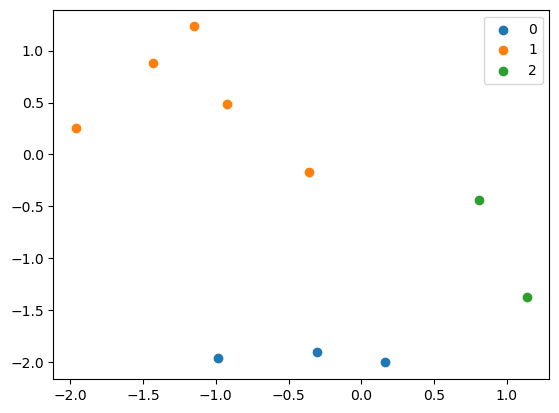

In [16]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(points[label == i , 0] , points[label == i , 1] , label = i)
plt.legend()
plt.show()

In [15]:
points = np.array([[4.44921468, 0.99067444],
                [0.96302552, 1.79996854],
                [4.28865161, 1.07127892],
                [0.93103109, 2.09965384],
                [0.87714783, 2.20467543],
                [4.31595483, 1.05237385],
                [0.82344716, 2.14171114],
                [4.20605954, 1.16302588],
                [4.34484718, 0.96594819],
                [0.81225409, 2.08657429]])
cluster_idx, centers, _, centers_mapping = KMeans()(points, 4, center_mapping=True)
centers_mapping

{0: array([[4.44921468, 0.99067444],
        [4.28865161, 1.07127892],
        [4.31595483, 1.05237385],
        [4.20605954, 1.16302588],
        [4.34484718, 0.96594819]]),
 1: array([[0.96302552, 1.79996854]]),
 2: array([[0.93103109, 2.09965384],
        [0.82344716, 2.14171114],
        [0.81225409, 2.08657429]]),
 3: array([[0.87714783, 2.20467543]])}

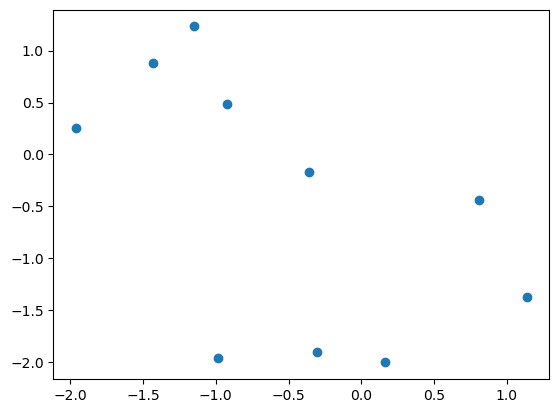

In [6]:
points = np.array([[-1.43120297,  0.8786823],
                            [-0.92082436,  0.48852312],
                            [-0.98384412, -1.95809560],
                            [ 0.16539071, -2.00230059],
                            [ 1.13874072, -1.37183974],
                            [-0.30292898, -1.90092874],
                            [-1.96110084,  0.25292960],
                            [ 0.80891560, -0.43945057],
                            [-0.35643708, -0.16907999],
                            [-1.15222464,  1.23224667]])
plt.scatter(points[:,0],points[:,1])
plt.show()

In [8]:
coefficient, test_mu_ins, test_mu_outs = silhouette_coefficient(points, cluster_idx, centers,centers_mapping)
test_mu_ins

centers_mapping:  {0: array([[4.44921468, 0.99067444],
       [4.28865161, 1.07127892],
       [4.31595483, 1.05237385],
       [4.20605954, 1.16302588],
       [4.34484718, 0.96594819]]), 1: array([[0.93103109, 2.09965384],
       [0.87714783, 2.20467543],
       [0.82344716, 2.14171114],
       [0.81225409, 2.08657429]]), 2: array([[0.96302552, 1.79996854]])}
cluster_idx:  [0 2 0 1 1 0 1 0 0 1]


array([[0.18295228, 0.        , 0.11392477, 0.11768176, 0.11184924,
        0.10678458, 0.08484272, 0.20462076, 0.13970259, 0.10350404]])